# Import bibliotek

In [2]:
import os
import pandas as pd

In [3]:
!pip install tensorflow

In [4]:
from platform import python_version
python_version()

'3.10.12'

# Przygotowanie danych do analizy

In [6]:
os.getcwd()

#base_data = pd.read_csv("/content/drive/MyDrive/DSP_4.csv")

os.chdir("/content/drive/MyDrive/SUML/datasets/")



In [ ]:
df = pd.read_csv("DSP_4.csv", sep=";")

In [ ]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_colwidth',10)
pd.set_option('display.max_rows',10)

display(df)

,objawy,wiek,choroby,wzrost,leki
0,1,NaN,0,170.0,2
1,1,65.0,0,NaN,3
2,1,55.0,0,182.0,4
3,1,44.0,0,187.0,3
4,1,77.0,0,165.0,2
...,...,...,...,...,...
55,5,25.0,0,199.0,1
56,5,33.0,1,200.0,2
57,5,42.0,2,187.0,3
58,5,32.0,0,168.0,4


In [ ]:
print(df)

In [ ]:
df.columns

Index(['objawy', 'wiek', 'choroby', 'wzrost', 'leki'], dtype='object')

In [ ]:
df.isnull().any()

objawy     False
wiek        True
choroby    False
wzrost      True
leki       False
dtype: bool

In [ ]:
print(df["wiek"].mean())

44.163636363636364


In [ ]:
print(df["wzrost"].mean())

183.34545454545454


In [ ]:
df_2 = df.fillna(df.mean())

In [ ]:
df_3 = df.fillna(df.median())
print(df["wiek"].median())
print(df["wzrost"].median())
df_4 = df.fillna(0)
display(df_3)
display(df_4)

43.0
187.0


,objawy,wiek,choroby,wzrost,leki
0,1,43.0,0,170.0,2
1,1,65.0,0,187.0,3
2,1,55.0,0,182.0,4
3,1,44.0,0,187.0,3
4,1,77.0,0,165.0,2
...,...,...,...,...,...
55,5,25.0,0,199.0,1
56,5,33.0,1,200.0,2
57,5,42.0,2,187.0,3
58,5,32.0,0,168.0,4


,objawy,wiek,choroby,wzrost,leki
0,1,0.0,0,170.0,2
1,1,65.0,0,0.0,3
2,1,55.0,0,182.0,4
3,1,44.0,0,187.0,3
4,1,77.0,0,165.0,2
...,...,...,...,...,...
55,5,25.0,0,199.0,1
56,5,33.0,1,200.0,2
57,5,42.0,2,187.0,3
58,5,32.0,0,168.0,4


In [ ]:
display(df_2)

In [ ]:
df_2.isnull().any()

# Podstawowe statystyki opisowe

In [ ]:
print(round(df["wiek"].mean(),2))
print(df["wiek"].median())
print(df["wiek"].max())
print(df["wiek"].min())
print(df["wiek"].var())

44.16
43.0
77.0
11.0
341.9171717171717


In [ ]:
df["wiek"].max() - df["wiek"].min()

66.0

In [ ]:
df["wiek"].quantile([.25,.5,.75])

0.25    32.0
0.50    43.0
0.75    55.5
Name: wiek, dtype: float64

In [ ]:
round(df["wiek"].std(),2)

18.49

In [ ]:
round(df.describe(),2)

,objawy,wiek,choroby,wzrost,leki
count,60.00,55.00,60.00,55.00,60.00
mean,2.53,44.16,1.42,183.35,2.50
std,1.29,18.49,1.62,12.56,1.03
min,1.00,11.00,0.00,159.00,1.00
25%,2.00,32.00,0.00,169.00,2.00
50%,2.00,43.00,1.00,187.00,2.50
75%,4.00,55.50,2.00,194.00,3.00
max,5.00,77.00,5.00,200.00,4.00


In [ ]:
df["wiek"].groupby(df["objawy"]).describe()

,count,mean,std,min,25%,50%,75%,max
objawy,,,,,,,,
1,12.0,60.916667,10.858246,44.0,54.75,64.0,65.50,77.0
2,20.0,28.200000,9.817278,11.0,21.00,32.0,34.00,42.0
3,7.0,56.571429,11.970201,43.0,49.00,55.0,62.00,76.0
4,10.0,56.000000,13.944334,34.0,46.50,54.5,65.00,76.0
5,6.0,29.666667,10.211105,12.0,26.75,32.5,33.75,42.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr

In [ ]:
df.corr()

,objawy,wiek,choroby,wzrost,leki
objawy,1.000000,-0.105504,0.110512,0.167664,-0.050666
wiek,-0.105504,1.000000,0.389564,-0.291871,-0.228091
choroby,0.110512,0.389564,1.000000,0.112124,0.045600
wzrost,0.167664,-0.291871,0.112124,1.000000,0.011842
leki,-0.050666,-0.228091,0.045600,0.011842,1.000000


<Axes: >

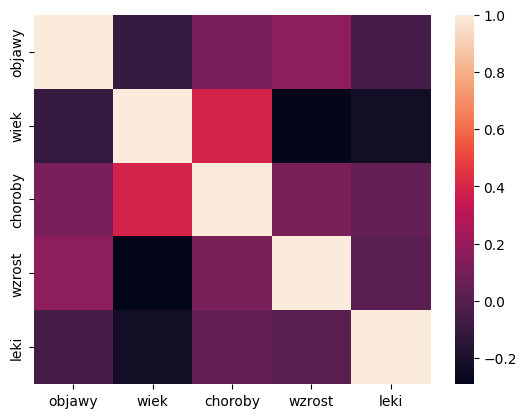

In [ ]:
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Analiza korelacji')

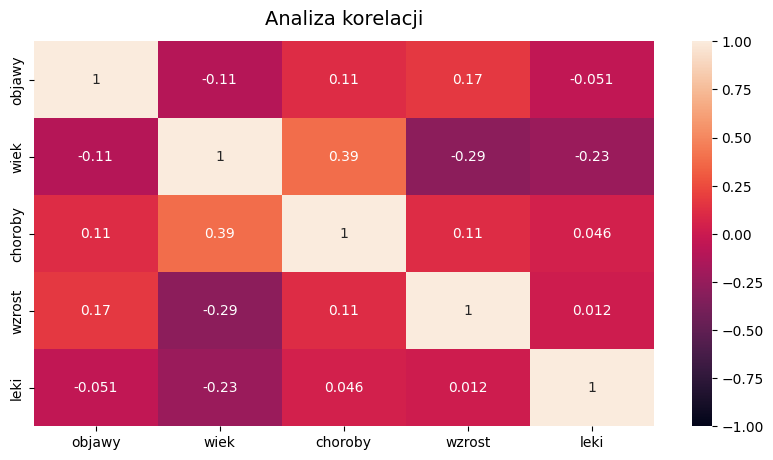

In [ ]:
plt.figure(figsize=(10,5))
heatmap = sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title("Analiza korelacji",fontdict={"fontsize":14}, pad=12)

# Zad1

In [ ]:
df = pd.read_csv("DSP_4.csv", sep=";")

In [ ]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_colwidth',10)
pd.set_option('display.max_rows',10)

display(df)

,objawy,wiek,choroby,wzrost,leki
0,1,NaN,0,170.0,2
1,1,65.0,0,NaN,3
2,1,55.0,0,182.0,4
3,1,44.0,0,187.0,3
4,1,77.0,0,165.0,2
...,...,...,...,...,...
55,5,25.0,0,199.0,1
56,5,33.0,1,200.0,2
57,5,42.0,2,187.0,3
58,5,32.0,0,168.0,4


# Zad2

In [ ]:
df_3 = df.fillna(df.median())
print(df["wiek"].median())
print(df["wzrost"].median())
df_4 = df.fillna(0)
display(df_3)
display(df_4)

43.0
187.0


,objawy,wiek,choroby,wzrost,leki
0,1,43.0,0,170.0,2
1,1,65.0,0,187.0,3
2,1,55.0,0,182.0,4
3,1,44.0,0,187.0,3
4,1,77.0,0,165.0,2
...,...,...,...,...,...
55,5,25.0,0,199.0,1
56,5,33.0,1,200.0,2
57,5,42.0,2,187.0,3
58,5,32.0,0,168.0,4


,objawy,wiek,choroby,wzrost,leki
0,1,0.0,0,170.0,2
1,1,65.0,0,0.0,3
2,1,55.0,0,182.0,4
3,1,44.0,0,187.0,3
4,1,77.0,0,165.0,2
...,...,...,...,...,...
55,5,25.0,0,199.0,1
56,5,33.0,1,200.0,2
57,5,42.0,2,187.0,3
58,5,32.0,0,168.0,4


# Zad3

In [7]:
df5 = pd.read_csv("DSP_5.csv", sep=";")

In [11]:
df5.isnull().any()

model    False
mpg      False
cyl      False
disp     False
hp       False
drat     False
wt       False
qsec     False
vs       False
am       False
gear     False
carb     False
dtype: bool

In [10]:
df5 = df5.fillna(df5.mean())

<ipython-input-10-3af18f8ff277>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df5 = df5.fillna(df5.mean())


In [14]:
print(round(df5["hp"].mean(),2))
print(df5["hp"].median())
print(df5["hp"].max() - df5["hp"].min())
print(df5["hp"].var())

143.52
123.0
283.0
4379.023933402706


In [ ]:
df5.corr()

Związek między "mpg" a "wt" jest bardzo znaczący. Współczynnik korelacji wynosi -0,864418, co oznacza, że istnieje silna, ujemna zależność. Innymi słowy, im mniejszy jest "wt", tym wyższa jest wartość "mpg". Jest to ważna informacja dla osób zainteresowanych oszczędnością paliwa.

# Zad4

In [21]:
df8 = pd.read_csv("DSP_8.csv", sep=",")

In [32]:
pd.set_option('display.max_rows',100)

In [33]:
print(df8)

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

In [44]:
print("liczba kolumn:", df8.columns.size)
print("liczba wierszy:", len(df8))

liczba kolumn: 12
liczba wierszy: 918


In [47]:
# a)
num_columns = df8.shape[1]
column_names = df8.columns.tolist()

# b)

# c)
missing_data = df8.isnull().sum()

# d)
mean_age_female = df8[df8['Sex'] == 'Female']['Age'].mean()
std_age_female = df8[df8['Sex'] == 'Female']['Age'].std()

mean_age_male = df8[df8['Sex'] == 'Male']['Age'].mean()
std_age_male = df8[df8['Sex'] == 'Male']['Age'].std()

# e)
percentage_male = (df8['Sex'] == 'Male').mean() * 100

# f)
females_age_45_to_50 = ((df8['Sex'] == 'Female') & (df8['Age'] >= 45) & (df8['Age'] <= 50)).sum()

# g)
subset_data = df8[df8['RestingECG'] == 'Normal']
correlation_matrix = subset_data.corr()

# Printy

print("a) Liczba kolumn (wraz z ich nazwami):")
print(f"   Liczba kolumn: {num_columns}")
print(f"   Nazwy kolumn: {', '.join(column_names)}\n")

print("b) Liczba wierszy (obserwacji):")
print(f"   Liczba wierszy: {num_rows}\n")

print("c) Ewentualne braki danych:")
print(missing_data)
print("\n")

print("d) Średni wiek i odchylenie standardowe w grupie kobiet i mężczyzn:")
print(f"   Średni wiek kobiet: {mean_age_female:.2f}, Odchylenie standardowe kobiet: {std_age_female:.2f}")
print(f"   Średni wiek mężczyzn: {mean_age_male:.2f}, Odchylenie standardowe mężczyzn: {std_age_male:.2f}\n")

print("e) Odsetek mężczyzn w zbiorze danych:")
print(f"   Odsetek mężczyzn: {percentage_male:.2f}%\n")

print("f) Liczba kobiet w wieku od 45 do 50 lat:")
print(f"   Liczba kobiet w wieku 45-50 lat: {females_age_45_to_50}\n")

print("g) Korelacje pomiędzy zmiennymi dla osób z EKG w czasie spoczynku w normie:")
print(correlation_matrix)


a) Liczba kolumn (wraz z ich nazwami):
   Liczba kolumn: 12
   Nazwy kolumn: Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease

b) Liczba wierszy (obserwacji):
   Liczba wierszy: 918

c) Ewentualne braki danych:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


d) Średni wiek i odchylenie standardowe w grupie kobiet i mężczyzn:
   Średni wiek kobiet: nan, Odchylenie standardowe kobiet: nan
   Średni wiek mężczyzn: nan, Odchylenie standardowe mężczyzn: nan

e) Odsetek mężczyzn w zbiorze danych:
   Odsetek mężczyzn: 0.00%

f) Liczba kobiet w wieku od 45 do 50 lat:
   Liczba kobiet w wieku 45-50 lat: 0

g) Korelacje pomiędzy zmiennymi dla osób z EKG w czasie spoczynku w normie:
                   Age  RestingBP 

<ipython-input-47-ba67c838775d>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_data.corr()
